# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head(160) 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,Setosa
146,4.8,3.0,1.4,0.1,Setosa
147,4.9,3.1,1.5,0.1,Setosa
148,4.9,3.6,1.4,0.1,setosa


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
df["species"].value_counts(dropna=False)

versicolor    39
setosa        35
virginica     34
Setosa        10
virginica      6
 virginica     5
VIRGINICA      5
Versicolor     5
VERSICOLOR     5
SETOSA         5
NaN            1
Name: species, dtype: int64

In [4]:
df["species"]=df["species"].map({
    "versicolor" : "Versicolor ", "VERSICOLOR" : "Versicolor ", "Versicolor" : "Versicolor ",
    "setosa" : "Setosa ", "SETOSA" : "Setosa " , "Setosa" : "Setosa ",
    "virginica" : "Virginica ", "virginica " : "Virginica ", " virginica" : "Virginica ", 
    "VIRGINICA" : "Virginica ", "Virginica" : "Virginica ",
    np.nan : "default"
},na_action=None)
df["species"].value_counts(dropna=False)

Setosa         50
Virginica      50
Versicolor     49
default         1
Name: species, dtype: int64

In [10]:
df["species"].value_counts(dropna=False)


Setosa         50
Virginica      50
Versicolor     49
default         1
Name: species, dtype: int64

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

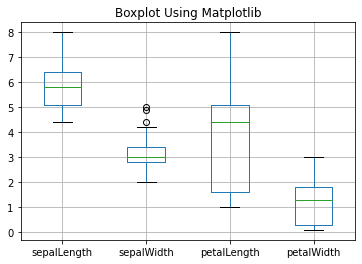

In [14]:
df.fillna(0)
df.boxplot(column=["sepalLength","sepalWidth","petalLength","petalWidth"])
plt.title("Boxplot Using Matplotlib")
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [18]:
## No esta claro si puede que haya mas de una medida fuera de los rangos, asi que cubrire todas las posibilidades
conditions = [
    (df["sepalLength"] < 4.0) | (df["sepalLength"] > 7.0),
    (df["sepalWidth"] < 2.0) | (df["sepalWidth"] > 4.5),
    (df["petalLength"] < 1.0) | (df["petalLength"] > 7.0),
    (df["petalWidth"] < 0.1) | (df["petalWidth"] > 2.5),
]

values = ["sepalLength","sepalWidth","petalLength","petalWidth"]
df["label"] = np.select(conditions, values)
df.head(150)

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,Setosa,petalWidth
1,7.2,3.6,6.1,2.5,Virginica,sepalLength
2,6.3,3.3,6.0,2.5,Virginica,0
3,6.7,3.3,5.7,2.5,Virginica,0
4,6.3,3.4,5.6,2.4,Virginica,0
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,Setosa,0
146,4.8,3.0,1.4,0.1,Setosa,0
147,4.9,3.1,1.5,0.1,Setosa,0
148,4.9,3.6,1.4,0.1,Setosa,0


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

<AxesSubplot:>

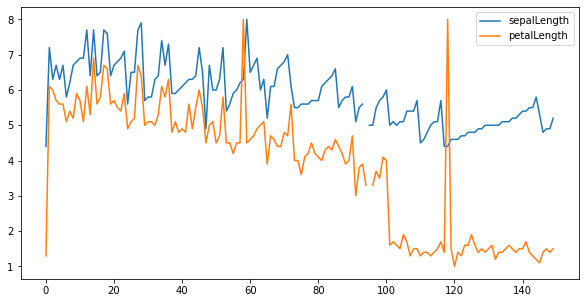

In [22]:
df.set_index("label").T
df[["sepalLength","petalLength"]].plot(figsize=(10,5))

<AxesSubplot:>

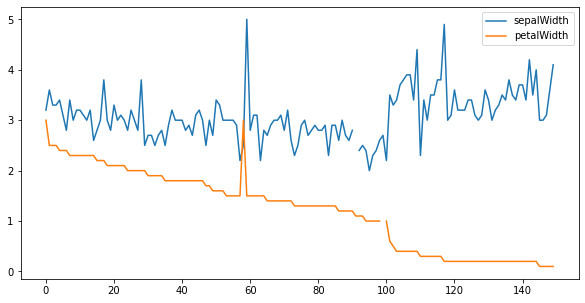

In [23]:
df.set_index("label").T
df[["sepalWidth","petalWidth"]].plot(figsize=(10,5))

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [27]:
df.replace(0,np.nan, inplace=True)
df. dropna()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,Setosa,petalWidth
1,7.2,3.6,6.1,2.5,Virginica,sepalLength
2,6.3,3.3,6.0,2.5,Virginica,0
3,6.7,3.3,5.7,2.5,Virginica,0
4,6.3,3.4,5.6,2.4,Virginica,0
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,Setosa,0
146,4.8,3.0,1.4,0.1,Setosa,0
147,4.9,3.1,1.5,0.1,Setosa,0
148,4.9,3.6,1.4,0.1,Setosa,0


<AxesSubplot:>

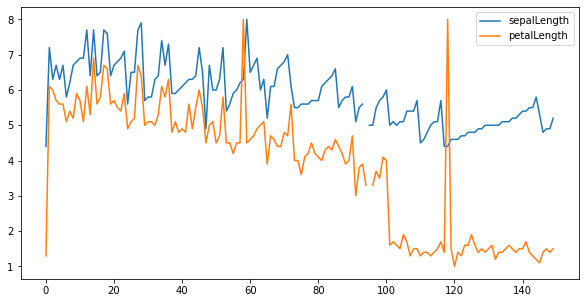

In [28]:
df.set_index("species").T
df[["sepalLength","petalLength"]].plot(figsize=(10,5))